# 1.1 What is the Business Objective?
The main objective is to predict the size category of burnt areas in forest fires using historical data. By accurately forecasting how severe a fire might be, local authorities in California can:

Improve resource allocation for firefighting.

Enhance early warning systems.

Plan preventive measures to minimize property loss, environmental damage, and threats to human and animal life.

# 1.2 Are there any Constraints?
Constraints include:

Limited data features: The dataset may not include all real-world variables (e.g., wind gusts, humidity fluctuations, human activity).

Data imbalance: There might be an uneven distribution of fire sizes (e.g., many small fires vs. few large ones), affecting model performance.

Timeliness: Predictions need to be fast and actionable in real-world scenarios.

Model interpretability: Authorities may need clear explanations for predictions to build trust and take action.

Real-time application: The final model must be lightweight and reliable enough to integrate with emergency response systems.

# 3.1 Data Cleaning & Feature Engineering

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load data
df = pd.read_csv("forestfires.csv")

In [4]:
# Show basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64


In [10]:
# Encode 'month' and 'day' using Label Encoding
label_encoders = {}
for col in ['month', 'day']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
# Log-transform the 'area' to reduce skewness
df['log_area'] = df['area'].apply(lambda x: np.log1p(x))  # log(1 + x)

# 3.2 Outlier Treatment using IQR

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns to check for outliers
num_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'area']

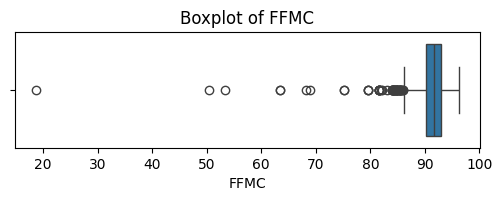

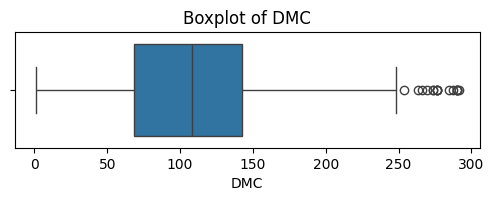

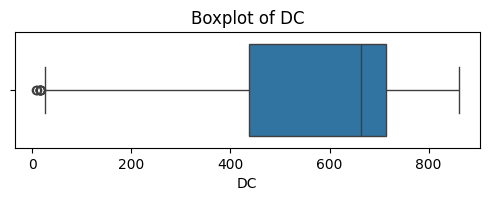

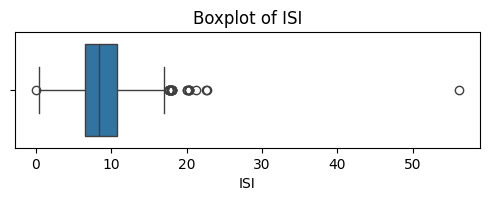

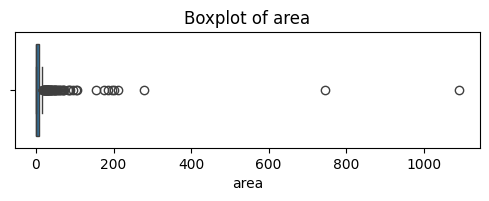

In [30]:
# Plot boxplots before treatment
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [32]:
# IQR method for outlier removal
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [34]:
# Remove outliers for each selected column
for col in num_cols:
    df = remove_outliers(df, col)

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (321, 32)


# 4.1 Summary

In [37]:
# Summary statistics
print(df.describe())

# Data types and shape
print("Data shape:", df.shape)
print("Data types:\n", df.dtypes)


            month         day        FFMC         DMC          DC         ISI  \
count  321.000000  321.000000  321.000000  321.000000  321.000000  321.000000   
mean     5.869159    2.822430   92.254517  124.113707  646.991900    9.947352   
std      4.659166    1.966023    1.672457   42.141791  116.655005    3.316653   
min      1.000000    0.000000   87.500000   35.400000  229.000000    3.700000   
25%      1.000000    1.000000   91.200000   96.900000  608.200000    7.200000   
50%      5.000000    3.000000   92.100000  117.900000  674.400000    9.000000   
75%     11.000000    4.000000   93.200000  145.400000  718.300000   12.200000   
max     11.000000    6.000000   96.200000  235.100000  822.800000   18.000000   

             temp          RH        wind        rain  ...  monthfeb  \
count  321.000000  321.000000  321.000000  321.000000  ...     321.0   
mean    20.751090   42.950156    3.736760    0.034268  ...       0.0   
std      4.441108   14.703869    1.667339    0.375096 

# 4.2 Univariate Analysis

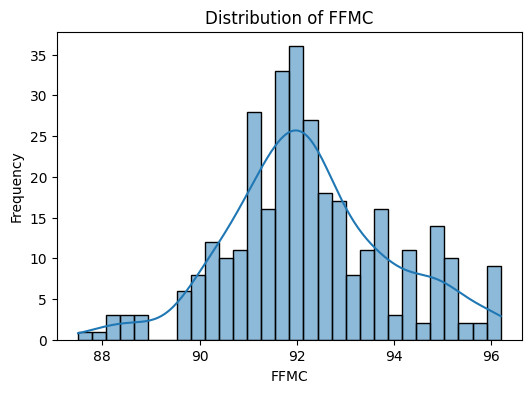

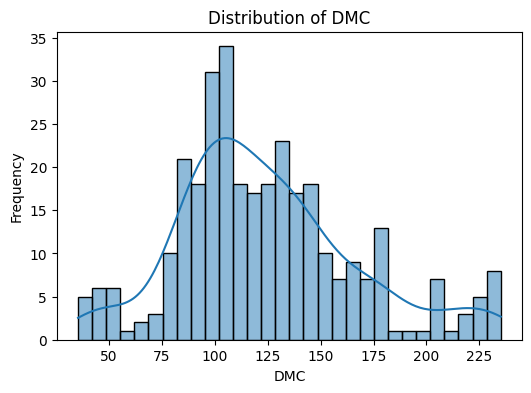

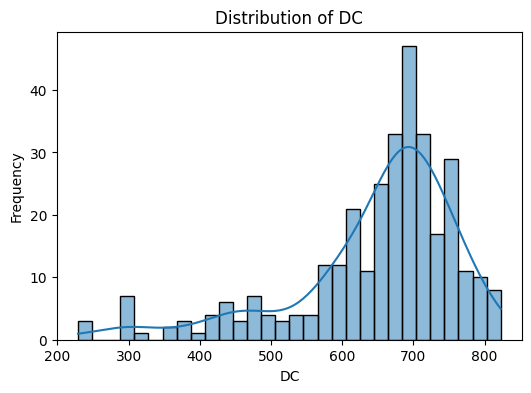

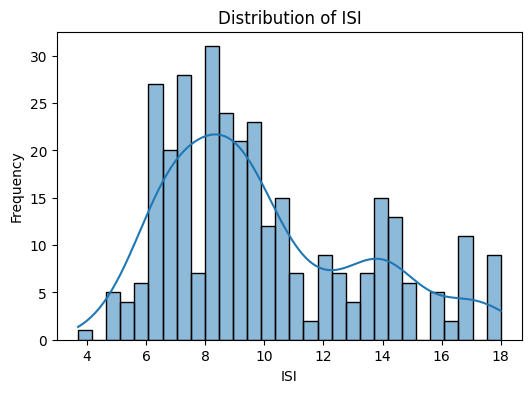

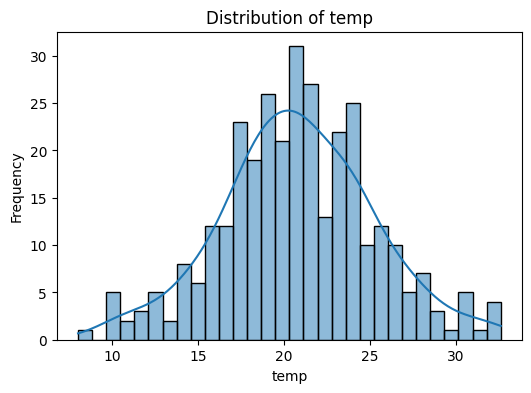

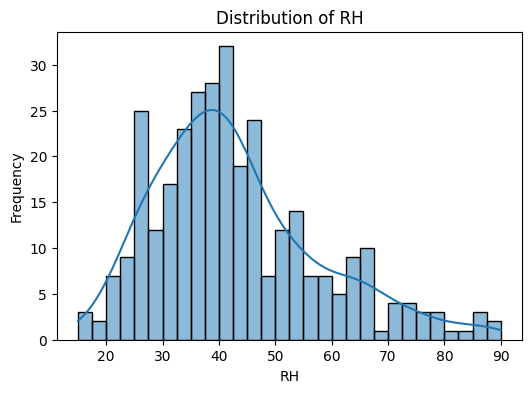

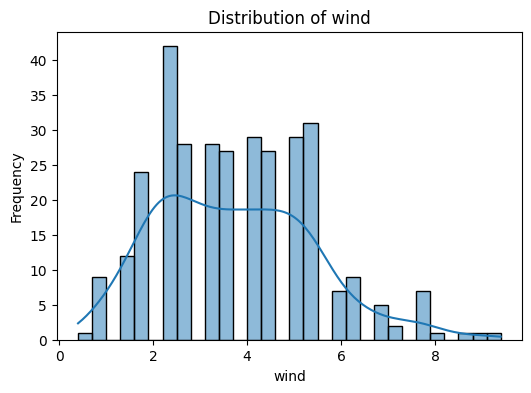

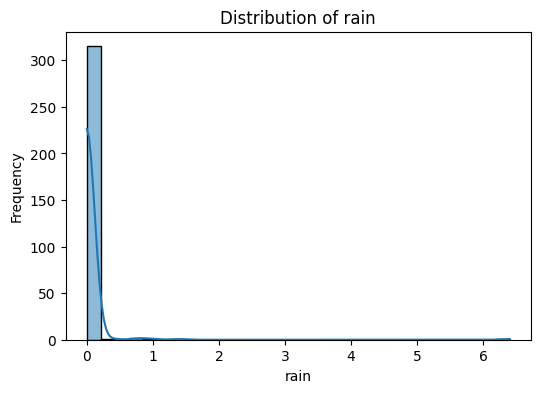

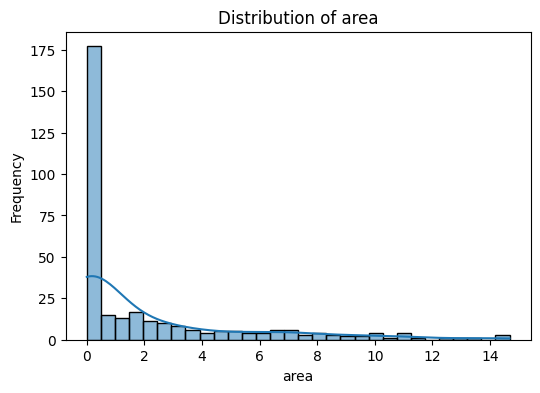

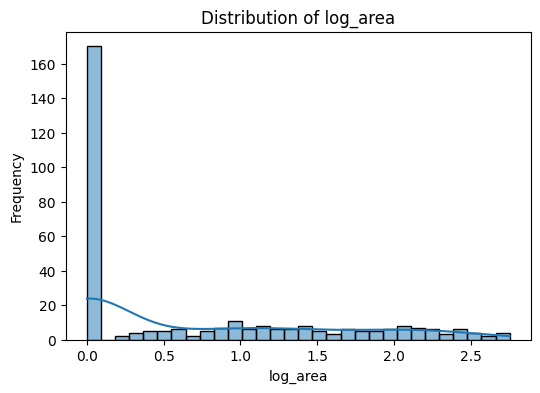

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
num_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'log_area']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

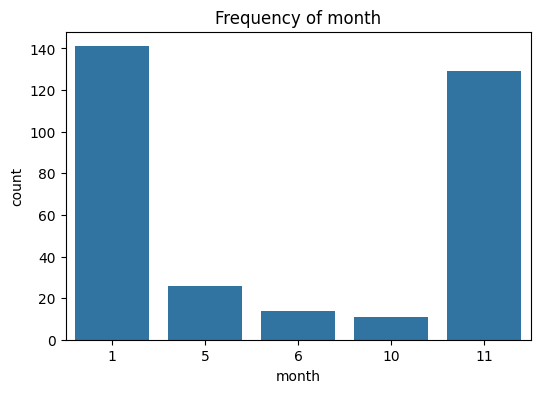

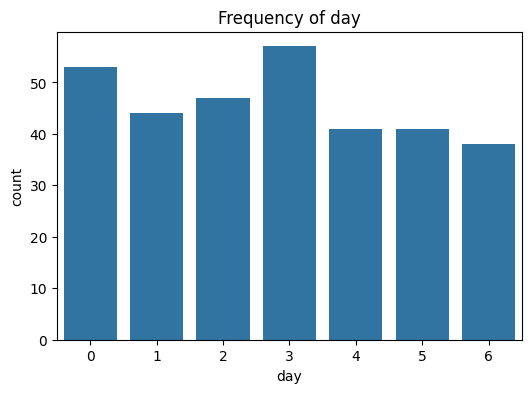

In [44]:
# Count plots for encoded categorical features
for col in ['month', 'day']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency of {col}')
    plt.show()

# 4.3 Bivariate Analysis

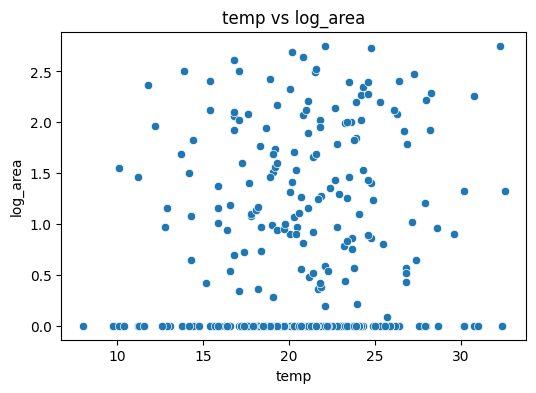

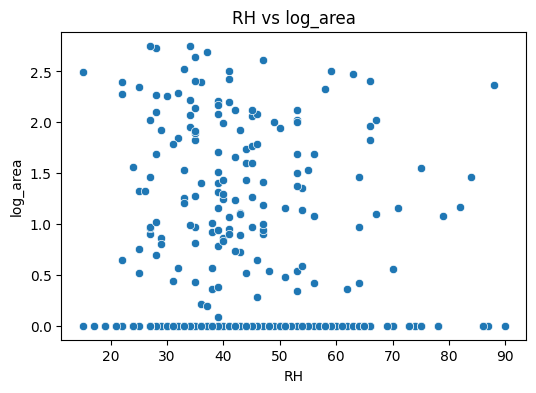

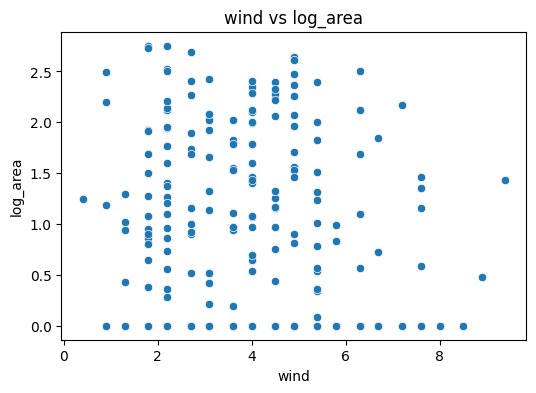

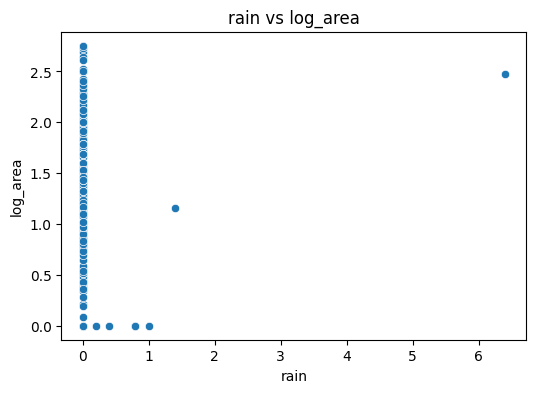

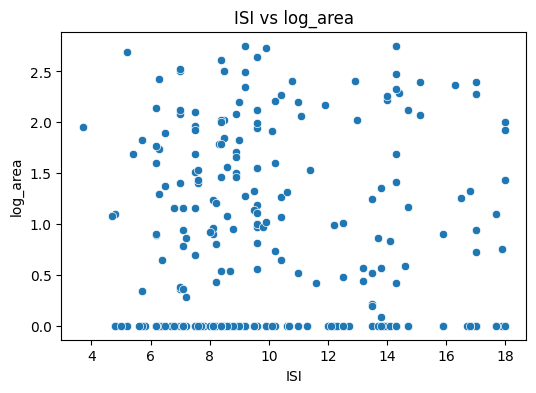

In [47]:
# Scatterplots against target variable 'log_area'
for col in ['temp', 'RH', 'wind', 'rain', 'ISI']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['log_area'])
    plt.title(f'{col} vs log_area')
    plt.xlabel(col)
    plt.ylabel('log_area')
    plt.show()

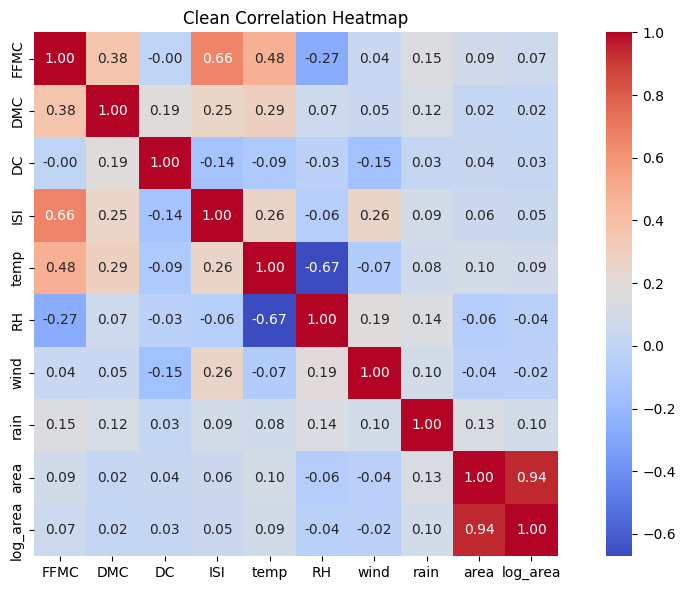

In [59]:
# Select only relevant numeric features
numeric_features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'log_area']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Clean Correlation Heatmap')
plt.tight_layout()
plt.show()


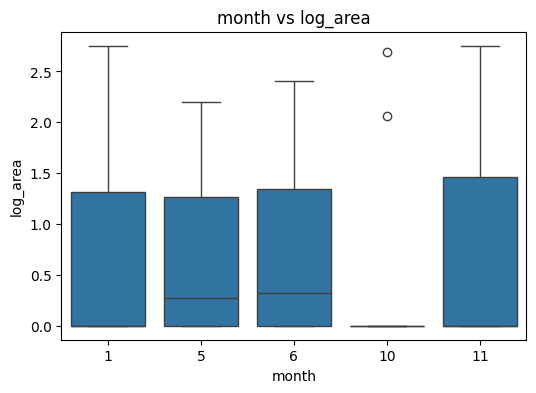

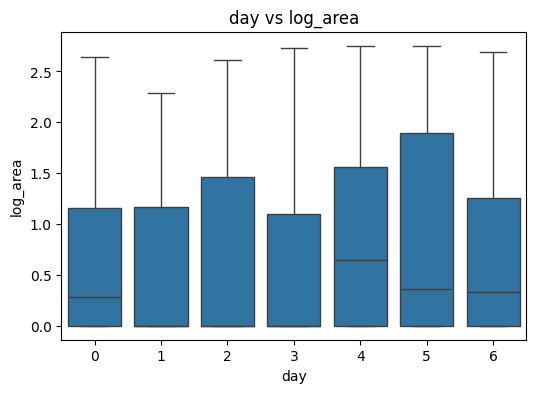

In [51]:
# Boxplots to compare log_area with categorical features
for col in ['month', 'day']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], y=df['log_area'])
    plt.title(f'{col} vs log_area')
    plt.show()

# 5.1 Build the Model on Scaled Data

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [80]:
# Features and target
X = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = df['area'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification: fire or no fire

In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5.2 Use the SVM Algorithm

In [87]:
# Try different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly', degree=3)

# Fit models
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)


SVC(kernel='poly')

Linear Kernel Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58        41
           1       0.33      0.38      0.35        24

    accuracy                           0.49        65
   macro avg       0.47      0.47      0.47        65
weighted avg       0.50      0.49      0.50        65



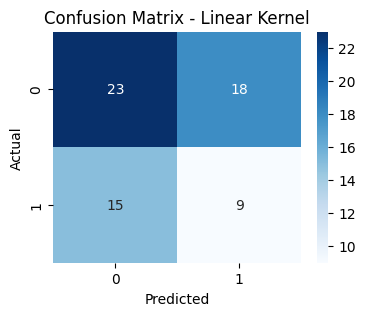

RBF Kernel Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.49      0.56        41
           1       0.40      0.58      0.47        24

    accuracy                           0.52        65
   macro avg       0.53      0.54      0.52        65
weighted avg       0.57      0.52      0.53        65



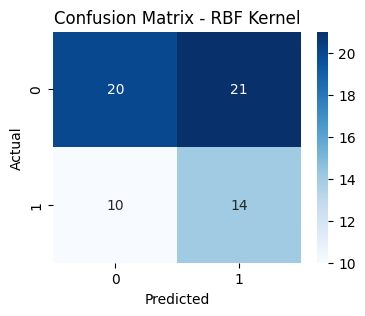

Polynomial Kernel Accuracy: 0.43
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.32      0.41        41
           1       0.35      0.62      0.45        24

    accuracy                           0.43        65
   macro avg       0.47      0.47      0.43        65
weighted avg       0.50      0.43      0.43        65



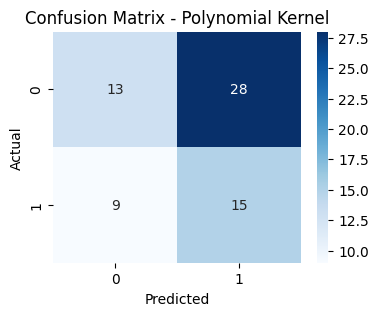

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

models = {'Linear': svm_linear, 'RBF': svm_rbf, 'Polynomial': svm_poly}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Kernel Accuracy: {acc:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name} Kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# PCA

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = selected features


In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 3 components (you can try 2–5)
X_pca = pca.fit_transform(X_scaled)


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy after PCA:", accuracy_score(y_test, y_pred))


Accuracy after PCA: 0.5384615384615384


# 6.Benefits/Impact of the solution 


Early Warning System: Enables proactive alerts to prevent loss, destruction, and casualties.

Resource Optimization: Allows efficient allocation of firefighting resources to high-risk areas.

Environmental Preservation: Helps conserve biodiversity and ecological balance by preventing forest fires.

Cost Savings for Government: Reduces fire recovery costs through preventive action.

Data-Driven Decision Making: Facilitates informed, real-time decision-making with model predictions.

Scalability & Automation: Can be integrated into weather systems for wider application without major new infrastructure.